# Machine Learning Internship Program at Prodigy InfoTech:
    

# Task4:
Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.



In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


excel_path = 'Data_Task4.xlsx'
df = pd.read_excel(excel_path)


filenames = df['Gestures:'].tolist()

labels = [filename.split('_')[0] for filename in filenames]


img_height, img_width = 150, 150


def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array


images = np.array([load_and_preprocess_image(file) for file in filenames])
labels = np.array(labels)


unique_labels = list(set(labels))
label_map = {label: index for index, label in enumerate(unique_labels)}
labels_encoded = np.array([label_map[label] for label in labels])
labels_encoded = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(unique_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


model.save('hand_gesture_recognition_model.h5')


D:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.7651 - val_accuracy: 0.0000e+00 - val_loss: 2.7917
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6667 - loss: 1.6960 - val_accuracy: 0.0000e+00 - val_loss: 1.5132
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6667 - loss: 0.5996 - val_accuracy: 1.0000 - val_loss: 0.5865
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.2444 - val_accuracy: 1.0000 - val_loss: 0.6640
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 1.0000 - loss: 0.0944 - val_accuracy: 1.0000 - val_loss: 0.6242
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 1.0000 - loss: 0.0512 - val_accuracy: 1.0000 - val_loss: 0.3457
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.1845
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 1.0000 - val_

Test Accuracy: 1.0


In [9]:
model.save('hand_gesture_recognition_model.keras')


In [10]:
print("Unique Labels:", unique_labels)


Unique Labels: ['gesture1', 'gesture2']


In [11]:
print("Unique Predicted Classes:", np.unique(y_pred_classes))
print("Unique True Classes:", np.unique(y_true_classes))


Unique Predicted Classes: [0]
Unique True Classes: [0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix:
[[1]]


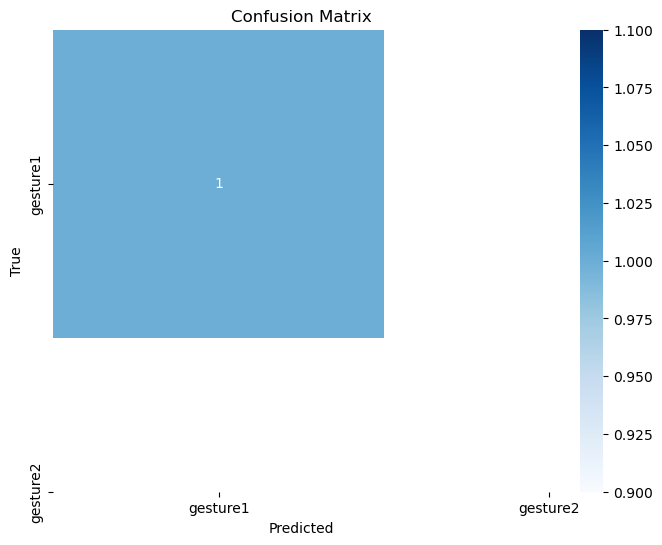

Classification Report:
              precision    recall  f1-score   support

    gesture1       1.00      1.00      1.00         1
    gesture2       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



D:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


report = classification_report(y_true_classes, y_pred_classes, target_names=unique_labels, labels=range(len(unique_labels)))
print("Classification Report:")
print(report)


In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def display_image_with_prediction(image_path, model, label_map):
   
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

   
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = [label for label, index in label_map.items() if index == predicted_class][0]

   
    plt.figure(figsize=(5, 5))
    plt.imshow(load_img(image_path))
    plt.title(f'Predicted Gesture: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label


In [19]:
from tensorflow.keras.models import load_model


model_path = 'hand_gesture_recognition_model.h5'
model = load_model(model_path)


In [20]:
from tensorflow.keras.models import load_model


model_path = 'hand_gesture_recognition_model.keras'
model = load_model(model_path)


D:\New folder\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:

label_map = {0: 'gesture1', 1: 'gesture2'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


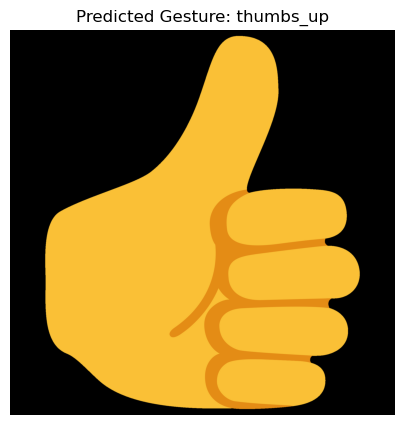

The gesture in the image is predicted as: thumbs_up


In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model


img_height, img_width = 150, 150


model_path = 'hand_gesture_recognition_model.h5'  
model = load_model(model_path)


label_map = {0: 'thumbs_up', 1: 'thumbs_down', 2: 'gesture1', 3: 'gesture2'} 

def display_image_with_prediction(image_path, model, label_map):
 
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

   
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]


    if predicted_class in label_map:
        predicted_label = label_map[predicted_class]
    else:
        predicted_label = "Unknown gesture"

  
    plt.figure(figsize=(5, 5))
    plt.imshow(load_img(image_path))
    plt.title(f'Predicted Gesture: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

image_path = 'gesture1_image1.jpg' 
predicted_label = display_image_with_prediction(image_path, model, label_map)
print(f'The gesture in the image is predicted as: {predicted_label}')
